In [1]:
# 기본 라이브러리 불러오기
from scipy.misc import imread # 이미지 불러오는 모듈
import numpy as np 
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
import os
import pandas as pd

In [2]:
path = "c:/python/workshopd/tweets/"

In [3]:
os.listdir(path)

['20141027', '20141110', '20160111']

In [4]:
folders = []
for folder in os.listdir(path):
    folders.append(path + folder + '/')

In [5]:
folders

['c:/python/workshopd/tweets/20141027/',
 'c:/python/workshopd/tweets/20141110/',
 'c:/python/workshopd/tweets/20160111/']

In [6]:
os.listdir(folders[0])

['2016년_11월_5일_0시_59분_트윗.xlsx',
 '2016년_11월_5일_1시_12분_트윗.xlsx',
 '2016년_11월_5일_1시_16분_트윗.xlsx',
 '2016년_11월_5일_1시_20분_트윗.xlsx',
 '2016년_11월_5일_1시_24분_트윗.xlsx',
 '2016년_11월_5일_1시_28분_트윗.xlsx',
 '2016년_11월_5일_1시_38분_트윗.xlsx',
 '2016년_11월_5일_1시_3분_트윗.xlsx',
 '2016년_11월_5일_1시_45분_트윗.xlsx',
 '2016년_11월_5일_1시_54분_트윗.xlsx',
 '2016년_11월_5일_1시_7분_트윗.xlsx',
 '2016년_11월_5일_2시_2분_트윗.xlsx',
 '2016년_11월_5일_2시_9분_트윗.xlsx']

In [7]:
data = pd.read_excel(folders[0] + '2016년_11월_5일_0시_59분_트윗.xlsx', header = 0)    

In [8]:
cols = ['nickname', 'id', 'date', 'tweet']
data.columns = cols

In [9]:
data.head()

,nickname,id,date,tweet
01번 트윗,복지국가,@bogji1,2014년 10월 20일,"""@florasujeong: @maisana2002 @andrewhong2 건물이 ..."
02번 트윗,미개한 봉족,@kangsj073,2014년 10월 20일,"문재인, 박 대통령 정면 비판 “개헌 논의 막는 건 월권·독재” [http://ne..."
03번 트윗,돌섬,@chursu85,2014년 10월 20일,"“@choioppa: [ 세월호 수현이 성금, 저소득층에 후원 ] 단원고 고 박수..."
04번 트윗,비,@vvvvie,2014년 10월 20일,검찰이'카카오 사찰'폭로한 정진우 노동당부대표가 허위기자회견으로 국가적혼란을 야기했...
05번 트윗,행복추구권,@psk8851,2014년 10월 20일,[송평인 칼럼]손석희만 오보한 환풍구 사고 : 동아닷컴 http://news.don...


In [10]:
import datetime as dt

In [11]:
# date 의 날짜를 datetime 형식으로 바꿔주자
type(data.date[0])    # str


str

In [12]:
pd.to_datetime(data.date[0], format = '%Y년 %m월 %d일')

Timestamp('2014-10-20 00:00:00')

In [13]:
dates = data['date']

In [14]:
data.shape[0]

1443

In [15]:
dates = []
for i in range(data.shape[0]):
    dates.append(pd.to_datetime(data.date[i], format = '%Y년 %m월 %d일'))

In [157]:
map(pd.to_datetime(format = '%Y년 %m월 %d일', data['date']))

SyntaxError: positional argument follows keyword argument (<ipython-input-157-8d10b892ba0e>, line 1)

In [16]:
len(dates)

1443

In [17]:
data['date'] = dates

In [18]:
data.head()

,nickname,id,date,tweet
01번 트윗,복지국가,@bogji1,2014-10-20,"""@florasujeong: @maisana2002 @andrewhong2 건물이 ..."
02번 트윗,미개한 봉족,@kangsj073,2014-10-20,"문재인, 박 대통령 정면 비판 “개헌 논의 막는 건 월권·독재” [http://ne..."
03번 트윗,돌섬,@chursu85,2014-10-20,"“@choioppa: [ 세월호 수현이 성금, 저소득층에 후원 ] 단원고 고 박수..."
04번 트윗,비,@vvvvie,2014-10-20,검찰이'카카오 사찰'폭로한 정진우 노동당부대표가 허위기자회견으로 국가적혼란을 야기했...
05번 트윗,행복추구권,@psk8851,2014-10-20,[송평인 칼럼]손석희만 오보한 환풍구 사고 : 동아닷컴 http://news.don...


In [19]:
tweets = []
for i in range(data.shape[0]):
    tweets.append(data['tweet'][i])

In [179]:
data.columns

Index(['level_0', 'index', 'nickname', 'id', 'date', 'tweet'], dtype='object')

In [180]:
data.drop(['level_0', 'index'], axis = 1)

,nickname,id,date,tweet
0,복지국가,@bogji1,2014-10-20,"""@florasujeong: @maisana2002 @andrewhong2 건물이 ..."
1,미개한 봉족,@kangsj073,2014-10-20,"문재인, 박 대통령 정면 비판 “개헌 논의 막는 건 월권·독재” [http://ne..."
2,돌섬,@chursu85,2014-10-20,"“@choioppa: [ 세월호 수현이 성금, 저소득층에 후원 ] 단원고 고 박수..."
3,비,@vvvvie,2014-10-20,검찰이'카카오 사찰'폭로한 정진우 노동당부대표가 허위기자회견으로 국가적혼란을 야기했...
4,행복추구권,@psk8851,2014-10-20,[송평인 칼럼]손석희만 오보한 환풍구 사고 : 동아닷컴 http://news.don...
5,보라도리,@pretty751,2014-10-20,정기국회 최대 관심 이슈는 ‘세월호 사건’으로 나타나 http://crey.tv/n...
6,"김태형. A.K.A. 김탱, 탱연출",@suicide7,2014-10-20,판교 환풍구 사고가 나자 한국과 일본의 환풍구를 비교하거나 누가 잘못했는지에 대한 ...
7,검정고무신,@keepjinbo,2014-10-20,세월호참사 189일 노숙농성 102일! 고공농성 스타케미칼 148일. 노숙농성 공무...
8,윤여경,@kyungyy,2014-10-20,[원칙이 서야 도로가 바뀐다] [4] 1t 트럭에 1.7t 화물… 전조등 不法개조…...
9,봉하막걸리(공공부정),@drama8945,2014-10-20,엄마들은 잊지 않는다..세월호와 민가협 | 미디어다음 http://durl.me/7...


In [183]:
import re
regex = r'[가-힣]+'
nlp.nouns(' '.join(re.findall(regex, str(data['tweet']))))

['건물',
 '문재인',
 '박',
 '대통령',
 '정면',
 '비판',
 '개헌',
 '논의',
 '건',
 '월권',
 '독재',
 '세월호',
 '수현',
 '성금',
 '소득',
 '층',
 '후원',
 '단원고',
 '고',
 '박수',
 '검찰',
 '카카오',
 '사찰',
 '폭로',
 '정진우',
 '노동',
 '당부',
 '대표',
 '허위',
 '기자회견',
 '국가',
 '혼란',
 '야기',
 '송평',
 '칼럼',
 '손석희',
 '오보',
 '환',
 '풍구',
 '사고',
 '동아닷컴',
 '정기',
 '국회',
 '최대',
 '관심',
 '이슈',
 '세월호',
 '사건',
 '판교',
 '환',
 '풍구',
 '사고',
 '한국',
 '일본',
 '환',
 '풍구',
 '누가',
 '대한',
 '세월호',
 '참사',
 '일',
 '노숙',
 '농성',
 '일',
 '고공',
 '농성',
 '스타',
 '케미칼',
 '일',
 '노숙',
 '농성',
 '공무',
 '원칙',
 '도로',
 '트럭',
 '화물',
 '전조등',
 '개조',
 '엄마',
 '세월호',
 '민가협',
 '미디어다음',
 '세월호',
 '참사',
 '개월',
 '공영',
 '방송',
 '경찰',
 '세월호',
 '추모',
 '집회',
 '시민',
 '검거',
 '표',
 '눈',
 '사람',
 '정치',
 '경제',
 '최근',
 '간',
 '눈',
 '자',
 '국가',
 '문인',
 '평론가',
 '세월호',
 '참사',
 '실종자',
 '가족',
 '슬픔',
 '보도',
 '세월호',
 '승객',
 '무슨',
 '잘못',
 '읍',
 '판단',
 '결정',
 '선장',
 '그',
 '세월호',
 '유족',
 '민중',
 '항쟁',
 '주년',
 '하루',
 '일',
 '저녁',
 '광주',
 '금남로',
 '세월호',
 '진',
 '경찰',
 '세월호',
 '추모',
 '집회',
 '시민',
 '검거',
 '표',
 '이완구',
 '우윤근',
 

In [167]:
regex = r'[가-힣]+'

import re
result = re.findall(regex, str(data['tweet']))
print("\n".join(result))

번
트윗
건물이
번
트윗
문재인
박
대통령
정면
비판
개헌
논의
막는
건
월권
독재
번
트윗
세월호
수현이
성금
저소득층에
후원
단원고
고
박수
번
트윗
검찰이
카카오
사찰
폭로한
정진우
노동당부대표가
허위기자회견으로
국가적혼란을
야기했
번
트윗
송평인
칼럼
손석희만
오보한
환풍구
사고
동아닷컴
번
트윗
정기국회
최대
관심
이슈는
세월호
사건
으로
나타나
번
트윗
판교
환풍구
사고가
나자
한국과
일본의
환풍구를
비교하거나
누가
잘못했는지에
대한
번
트윗
세월호참사
일
노숙농성
일
고공농성
스타케미칼
일
노숙농성
공무
번
트윗
원칙이
서야
도로가
바뀐다
트럭에
화물
전조등
개조
번
트윗
엄마들은
잊지
않는다
세월호와
민가협
미디어다음
번
트윗
세월호
참사
개월
잊은
공영방송
기억한
번
트윗
경찰
세월호
추모
집회
시민
많이
검거해
표
번
트윗
눈먼
사람들의
정치경제
최근
출간된
눈먼
자들의
국가
에는
문인과
평론가들이
번
트윗
세월호
참사
실종자
가족의
슬픔
보도
번
트윗
세월호의
승객들이
무슨
잘못이
있었겠읍니까
잘못된
판단과
결정을
내린
선장에게
그
번
트윗
세월호
유족들
본받아
번
트윗
민중항쟁
주년을
하루
앞둔
일
저녁
광주
금남로에서는
세월호
진
번
트윗
경찰
세월호
추모
집회
시민
많이
검거해
표
번
트윗
이완구
우윤근
일
세월호
법
회동
의견차
좁혀질까
번
트윗
초등생에게
이런
짓이나
하던
정권이니
세월호
사고가
안날까
번
트윗
조선
패널
새민년
정부
뭐했냐
는
질타나온다
세월호이후변하지않았다
엄
번
트윗
사설
대통령이
세월호
진상조사위원장을
임명하겠다니
번
트윗
건약
홍미정
교수님과
미류
활동가
세월호
유가족들과
함께
한
하반기
전국행사
번
트윗
문재인
의원님의
오늘
비대위
발언내용
발언전문
번
트윗
이정희
새누리당
세월호
조사위
정쟁
진원지로
만들려
해
새누리당은
진상조사위
번
트윗
김재연
경찰
세월호
집회
진보단체만
채증
미디어다음
번
트윗
세월호
추모자는
다잡아가고
가스통할배들은
체증조차
단한건도
안한경찰
번
트윗
김재연
경찰
세월호
집회
진

In [21]:
type(tweets)

list

In [22]:
twts_str = str(tweets)

In [23]:
wc = WordCloud(background_color = "white", max_words = 500)
wc.generate(twts_str)
plt.imshow(wc)

In [24]:
from konlpy.tag import Twitter
from collections import Counter
import pytagcloud

In [25]:
nlp = Twitter()
nouns = nlp.nouns(twts_str)
n_counts = Counter(nouns)

In [54]:
twt_words = nlp.pos(twts_str, norm = True, stem = True)
twt_words_counts = Counter(twt_words)

[("['", 'Foreign'),
 ('"@florasujeong', 'ScreenName'),
 (':', 'Punctuation'),
 ('@maisana2002', 'ScreenName'),
 ('@andrewhong2', 'ScreenName'),
 ('건물', 'Noun'),
 ('이', 'Josa'),
 ('성남시', 'Noun'),
 ('소유', 'Noun'),
 ('라', 'Josa'),
 ('이재명', 'Noun'),
 ('책임', 'Noun'),
 ('이라', 'Josa'),
 ('..', 'Punctuation'),
 ('그', 'Noun'),
 ('논리', 'Noun'),
 ('대로', 'Josa'),
 ('라면', 'Noun'),
 ('대한민국', 'Noun'),
 ('대통령', 'Noun'),
 ('은', 'Josa'),
 ('박근혜', 'Noun'),
 ('니까', 'Josa'),
 ('세월호', 'Noun'),
 ('는', 'Josa'),
 ('박근혜', 'Noun'),
 ('가', 'Josa'),
 ('책임지다', 'Verb'),
 ('!', 'Punctuation'),
 ('그렇다', 'Adjective'),
 ('일베', 'Noun'),
 ('분들', 'Suffix'),
 ('?', 'Punctuation'),
 ('ㅋㅋ', 'KoreanParticle'),
 ('아', 'Exclamation'),
 ('어이', 'Noun'),
 ('없다', 'Adjective'),
 ('ㅋㅋ', 'KoreanParticle'),
 ('"\',', 'Punctuation'),
 ("'", 'Punctuation'),
 ('문재인', 'Noun'),
 (',', 'Punctuation'),
 ('박', 'Noun'),
 ('대통령', 'Noun'),
 ('정면', 'Noun'),
 ('비판', 'Noun'),
 ('“', 'Foreign'),
 ('개헌', 'Noun'),
 ('논의', 'Noun'),
 ('막다', 'Verb'),
 ('건'

In [59]:
twt_words_counts.most_common(100)

[(('세월호', 'Noun'), 1625),
 (('하다', 'Verb'), 1433),
 (("'", 'Punctuation'), 1263),
 (('.', 'Punctuation'), 977),
 (('을', 'Josa'), 844),
 (("',", 'Punctuation'), 839),
 ((',', 'Punctuation'), 801),
 (('이', 'Josa'), 771),
 (('의', 'Josa'), 683),
 (('"', 'Punctuation'), 639),
 (('에', 'Josa'), 568),
 ((':', 'Punctuation'), 547),
 (('들', 'Suffix'), 528),
 (('은', 'Josa'), 521),
 (('…', 'Foreign'), 458),
 (('는', 'Josa'), 435),
 (('가', 'Josa'), 418),
 (('를', 'Josa'), 375),
 (('참사', 'Noun'), 301),
 (('되다', 'Verb'), 251),
 (('?', 'Punctuation'), 251),
 (('집회', 'Noun'), 248),
 (('있다', 'Adjective'), 234),
 (('경찰', 'Noun'), 234),
 (('도', 'Josa'), 223),
 (('으로', 'Josa'), 209),
 (('사고', 'Noun'), 204),
 (('것', 'Noun'), 192),
 ((']', 'Punctuation'), 190),
 (('!', 'Punctuation'), 187),
 (('에서', 'Josa'), 185),
 (('없다', 'Adjective'), 183),
 (('않다', 'Verb'), 181),
 (('과', 'Josa'), 175),
 (('일', 'Noun'), 167),
 (('와', 'Josa'), 166),
 (('...', 'Punctuation'), 158),
 (('진상', 'Noun'), 156),
 (('’', 'Foreign'), 1

In [184]:
n_counts.most_common(10)

[('세월호', 1625),
 ('참사', 301),
 ('집회', 248),
 ('경찰', 234),
 ('사고', 204),
 ('것', 185),
 ('일', 167),
 ('진상', 156),
 ('단체', 144),
 ('대통령', 142)]

In [27]:
tag2 = n_counts.most_common(100)
tag3 = n_counts.most_common(100)[1:]

In [28]:
taglist2 = pytagcloud.make_tags(tag2, maxsize = 80)
taglist3 = pytagcloud.make_tags(tag3, maxsize = 80)

In [29]:
pytagcloud.create_tag_image(taglist2, 'wordcloud2.jpg', size = (900, 600),
                            fontname = 'korean', rectangular = False)

pytagcloud.create_tag_image(taglist3, 'wordcloud3.jpg', size = (900, 600),
                            fontname = 'korean', rectangular = False)

In [31]:
# 워드 클라우드를 만듦 
# 여기서는 아직 텍스트는 들어가지 않고 틀만 만들어짐
# 중요한 것은 기본 폰트는 한글 지원을 안하기 때문에 한글 폰트 주소를 써줘야함
# 여기서의 기본 폰트는 맑은 고딕, 오이체 찾게 되면 사용 가능
wc = WordCloud(font_path="C:\Windows\Fonts\맑은고딕\malgunbd.ttf", 
               background_color="white", 
               max_words=500) # mark 부분이 이미지에 맞게 그림을 그리게 하는 부분

In [35]:
# 워드 클라우드에 텍스트를 올림
wc.generate(twts_str)

In [36]:
# 현재는 그림을 그려보면 색깔이 자기 맘대로임
plt.imshow(wc)

In [ ]:
# 로고에서 색상을 뽑아오는 작업
image_color = ImageColorGenerator(logo)

In [ ]:
# 위에서 뽑은 색깔로 다시 색칠함
wc.recolor(color_func=image_color)

In [ ]:
# 그려보면 색깔이 바뀐 것을 알 수 있음
plt.imshow(wc)

In [37]:
# 워드 클라우드 이미지를 저장함
wc.to_file("wordcloud_logo.png")

In [46]:
regex = r'[가-힣]+'

import re
result = re.findall(regex, twts_str)
print("\n".join(result))

건물이
성남시
소유라
이재명
책임이라
그
논리대로라면
대한민국
대통령은
박근혜니까
세월호는
박근혜가
책임져야지
그렇죠
일베분들
아
어이
없다
문재인
박
대통령
정면
비판
개헌
논의
막는
건
월권
독재
문재인
세월호법엔
잘도
야합하더니만
세월호
수현이
성금
저소득층에
후원
단원고
고
박수현
군
부모님이
수현이
앞으로
들어온
성금을
저소득층
후원금으로
내놓으셨습니다
검찰이
카카오
사찰
폭로한
정진우
노동당부대표가
허위기자회견으로
국가적혼란을
야기했다며
재수감을
시키려한단다
피해당사자가
폭로하여
시중에
사건이
밝혀지면
사회혼란
야기시키는거란거다
세월호도
이런식이라서
유족들이
특별법에
기소
수사권
요구
시위벌이는거다
송평인
칼럼
손석희만
오보한
환풍구
사고
동아닷컴
공인정신을
망각하고
확인안된
선동방송으로
세월호
처럼
사고를
사건으로
몰아
나라를
혼란에
빠지게
하려는
의도가
의심
스럽다
정기국회
최대
관심
이슈는
세월호
사건
으로
나타나
판교
환풍구
사고가
나자
한국과
일본의
환풍구를
비교하거나
누가
잘못했는지에
대한
책임공방이
뜨겁다
세월호
이후
안전관련
회의만
여
차례
열렸다
이것은
근본적으로
정부가
안전에
대한
회의만
세월호참사
일
노숙농성
일
고공농성
스타케미칼
일
노숙농성
공무원노조
일
대학강사노조
일
기륭전자
코오롱
콜트
콜텍
쌍용차
재능교육
강정
밀양
청도
입니다
원칙이
서야
도로가
바뀐다
트럭에
화물
전조등
개조
곳곳에
도로의
세월호
엄마들은
잊지
않는다
세월호와
민가협
미디어다음
세월호
참사
개월
잊은
공영방송
기억한
경찰
세월호
추모
집회
시민
많이
검거해
표창
강민수
기자
눈먼
사람들의
정치경제
최근
출간된
눈먼
자들의
국가
에는
문인과
평론가들이
쓴
세월호
관련
글
편이
담겨
있다
초판
부가
한
달
만에
매진된
것을
보면
세월
세월호
참사
실종자
가족의
슬픔
보도
님이
씀
세월호의
승객들이
무슨
잘못이
있었겠읍니까
잘못된
판단과
결정을
내린
선장에게
그
책임이
있지
않겠읍니까
선장의
잘못된
생각과
행동으로
많은
사람이
죽었읍니다
나는
그
책임을


In [97]:
result_str = str(result)
result_str

"['건물이', '성남시', '소유라', '이재명', '책임이라', '그', '논리대로라면', '대한민국', '대통령은', '박근혜니까', '세월호는', '박근혜가', '책임져야지', '그렇죠', '일베분들', '아', '어이', '없다', '문재인', '박', '대통령', '정면', '비판', '개헌', '논의', '막는', '건', '월권', '독재', '문재인', '세월호법엔', '잘도', '야합하더니만', '세월호', '수현이', '성금', '저소득층에', '후원', '단원고', '고', '박수현', '군', '부모님이', '수현이', '앞으로', '들어온', '성금을', '저소득층', '후원금으로', '내놓으셨습니다', '검찰이', '카카오', '사찰', '폭로한', '정진우', '노동당부대표가', '허위기자회견으로', '국가적혼란을', '야기했다며', '재수감을', '시키려한단다', '피해당사자가', '폭로하여', '시중에', '사건이', '밝혀지면', '사회혼란', '야기시키는거란거다', '세월호도', '이런식이라서', '유족들이', '특별법에', '기소', '수사권', '요구', '시위벌이는거다', '송평인', '칼럼', '손석희만', '오보한', '환풍구', '사고', '동아닷컴', '공인정신을', '망각하고', '확인안된', '선동방송으로', '세월호', '처럼', '사고를', '사건으로', '몰아', '나라를', '혼란에', '빠지게', '하려는', '의도가', '의심', '스럽다', '정기국회', '최대', '관심', '이슈는', '세월호', '사건', '으로', '나타나', '판교', '환풍구', '사고가', '나자', '한국과', '일본의', '환풍구를', '비교하거나', '누가', '잘못했는지에', '대한', '책임공방이', '뜨겁다', '세월호', '이후', '안전관련', '회의만', '여', '차례', '열렸다', '이것은', '근본적으로', '정부가', '안전에', '대한', '회의만', '세월호참사', '일', '노숙농성', 

In [68]:
# 트위터 단어들을 normalize, stem 한 뒤 POS 붙이기
# POS 를 통해 Noun, Adjective, Verb 만 추려낼 예정
twt_pos = nlp.pos(result_str, norm = True, stem = True)
twt_pos

[("['", 'Punctuation'),
 ('건물', 'Noun'),
 ('이', 'Josa'),
 ("',", 'Punctuation'),
 ("'", 'Punctuation'),
 ('성남시', 'Noun'),
 ("',", 'Punctuation'),
 ("'", 'Punctuation'),
 ('소유', 'Noun'),
 ('라', 'Josa'),
 ("',", 'Punctuation'),
 ("'", 'Punctuation'),
 ('이재명', 'Noun'),
 ("',", 'Punctuation'),
 ("'", 'Punctuation'),
 ('책임', 'Noun'),
 ('이라', 'Josa'),
 ("',", 'Punctuation'),
 ("'", 'Punctuation'),
 ('그', 'Noun'),
 ("',", 'Punctuation'),
 ("'", 'Punctuation'),
 ('논리', 'Noun'),
 ('대로', 'Josa'),
 ('라면', 'Noun'),
 ("',", 'Punctuation'),
 ("'", 'Punctuation'),
 ('대한민국', 'Noun'),
 ("',", 'Punctuation'),
 ("'", 'Punctuation'),
 ('대통령', 'Noun'),
 ('은', 'Josa'),
 ("',", 'Punctuation'),
 ("'", 'Punctuation'),
 ('박근혜', 'Noun'),
 ('니까', 'Josa'),
 ("',", 'Punctuation'),
 ("'", 'Punctuation'),
 ('세월호', 'Noun'),
 ('는', 'Josa'),
 ("',", 'Punctuation'),
 ("'", 'Punctuation'),
 ('박근혜', 'Noun'),
 ('가', 'Josa'),
 ("',", 'Punctuation'),
 ("'", 'Punctuation'),
 ('책임지다', 'Verb'),
 ("',", 'Punctuation'),
 ("'", 'Pu

In [140]:
# POS 가 Noun 인 단어들만 추려내서 twt_pos2 에 저장하기
twt_pos2 = []
for (k, v) in twt_pos:
    if v == 'Noun' and len(k) > 1:
        twt_pos2.append(k)

# POS 가 Noun, Adjective, Verb 인 단어들만 추려내서 twt_pos2 에 저장하기
# twt_pos2 = []
# for (k, v) in twt_pos:
#     if v == 'Noun' or v == 'Adjective' or v == 'Verb' and len(k) > 1:
#         twt_pos2.append(k)


In [124]:
twt_pos2_counts = Counter(twt_pos2)

tag4 = twt_pos2_counts.most_common(100)[2:]
taglist4 = pytagcloud.make_tags(tag4, maxsize = 80)
pytagcloud.create_tag_image(taglist4, 'wordcloud4_layout70.png', size = (720, 400),
                            fontname = 'korean', rectangular = False, layout = 70)
# layout = 1; 단어 세로로 정렬
# layout = 2; 단어 가로로 정렬
# layout = 3; 단어 가로로 정렬, layout = 2 와 유사함
# layout = 4; 단어 가로/세로로 배열

In [103]:
# 기본 라이브러리 불러오기
from scipy.misc import imread # 이미지 불러오는 모듈
import numpy as np 
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
%matplotlib inline

In [152]:
# 3개의 다른 로고를 불러와서 저장하기
path_logo = 'C:/Python/WorkshopD/Sewol logos/'

logo1 = imread(path_logo + "세월호1.jpg")
logo2 = imread(path_logo + "세월호2.jpg")
logo3 = imread(path_logo + "세월호3.jpg")

In [112]:
twt_pos3 = ' '.join(twt_pos2)

In [187]:
twt_pos3

'건물 성남시 소유 이재명 책임 논리 라면 대한민국 대통령 박근혜 세월호 박근혜 일베 어이 문재인 대통령 정면 비판 개헌 논의 월권 독재 문재인 세월호 세월호 수현 성금 소득 후원 단원고 박수현 부모님 수현 성금 소득 원금 셨습 검찰 카카오 사찰 폭로 정진우 노동 당부 대표 허위 기자회견 국가 혼란 야기 재수감 한단 피해 당사자 폭로 시중 사건 사회 혼란 야기 세월호 식이 유족 특별법 기소 수사권 요구 시위 송평 칼럼 손석희 오보 풍구 사고 동아닷컴 공인 정신 망각 확인 선동 방송 세월호 처럼 사고 사건 나라 혼란 의도 의심 정기 국회 최대 관심 이슈 세월호 사건 판교 풍구 사고 한국 일본 풍구 비교 누가 잘못 대한 책임 방이 세월호 이후 안전 관련 회의 차례 근본 정부 안전 대한 회의 세월호 참사 노숙 농성 고공 농성 스타 케미칼 노숙 농성 공무원 노조 대학 강사 노조 기륭전자 코오롱 콜트 콜텍 쌍용차 재능교육 강정 밀양 청도 원칙 도로 트럭 화물 전조등 개조 곳곳 도로 세월호 엄마 세월호 민가협 미디어다음 세월호 참사 개월 공영 방송 기억 경찰 세월호 추모 집회 시민 검거 표창 강민수 기자 사람 정치 경제 최근 국가 문인 평론가 세월호 관련 편이 초판 부가 매진 세월 세월호 참사 실종자 가족 슬픔 보도 세월호 승객 무슨 잘못 잘못 판단 결정 선장 책임 선장 잘못 생각 행동 사람 읍니 책임 번개 트윗 하나님 말씀 계시 세월호 유족 뫠는데 민중 항쟁 주년 하루 저녁 광주 금남로 세월호 진상 규명 책임자 처벌 정신 계승 민주 대성 경찰 세월호 추모 집회 시민 검거 표창 강민수 기자 이완구 우윤근 세월호 회동 의견 동아일보 초등생 정권 세월호 사고 조선 패널 새민년 정부 타나 세월호 이후 엄성섭 정부 경기도 성남 윤슬기 정부조직법 통과 판교 드런넘들 정부 대통령 언급 앵커 홧팅 사설 대통령 세월호 진상 조사 위원장 임명 건약 홍미정 교수 활동가 세월호 유가족 하반기 전국 행사 세월호 싸움 이제 시작 라며 경빈 어머님 마디 문재인 의원님 오늘 대위 발언 내용 발언 

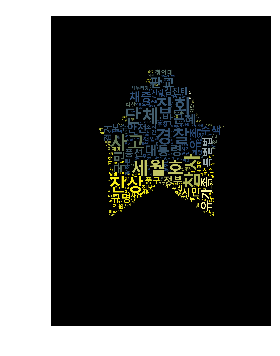

In [155]:
image_color1 = ImageColorGenerator(logo1)

wc1 = WordCloud(font_path="C:\Windows\Fonts\맑은고딕\malgunbd.ttf",
               background_color = "black", mask = logo1, ranks_only = True,
               color_func = image_color1)
wc1.generate(twt_pos3)
plt.axis('off')
plt.imshow(wc1)

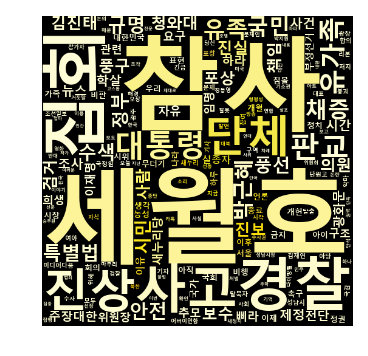

In [154]:
image_color2 = ImageColorGenerator(logo2)

wc2 = WordCloud(font_path="C:\Windows\Fonts\맑은고딕\malgunbd.ttf",
               background_color = "black", mask = logo2, ranks_only = True,
               color_func = image_color2)
wc2.generate(twt_pos3)
plt.axis('off')
plt.imshow(wc2)

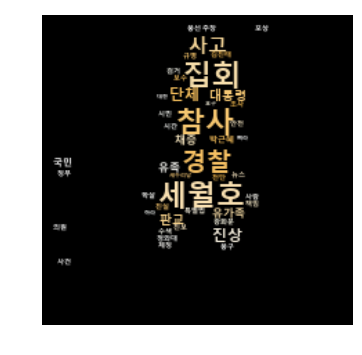

In [144]:
image_color3 = ImageColorGenerator(logo3)

wc3 = WordCloud(font_path="C:\Windows\Fonts\맑은고딕\malgunbd.ttf",
               background_color = "black",
              mask = logo3, color_func = image_color3, ranks_only = True,
                prefer_horizontal = 1)
wc3.generate(twt_pos3)
plt.axis('off')
plt.imshow(wc3)

In [ ]:
image_color3 = ImageColorGenerator(logo3)

wc3 = WordCloud(font_path="C:\Windows\Fonts\맑은고딕\malgunbd.ttf",
               background_color = "black",
              mask = logo3, color_func = image_color3, ranks_only = True,
                prefer_horizontal = 1)
wc3.generate(twt_pos3)
plt.imshow(wc3)